In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [ ]:
!ls

drive  sample_data


In [ ]:
from keras.models import load_model
path_model_1="/content/drive/MyDrive/Internship Cilans/20220630_071030sigmoid with true logits_model_.h5"
path_model_2="/content/drive/MyDrive/Internship Cilans/20220701_032943sigmoid with false logits_model_.h5"
model_2=load_model(path_model_2)
model_1=load_model(path_model_1)

In [ ]:
model_2

In [ ]:
cd Bad_bw

/content/drive/.shortcut-targets-by-id/18B-EF29jaQ5JUM1JVDfvn_QTfcHA5Hr8/KnitSmart Data and Project Details (Confidential)/B&W Dataset(good and fault) Arducam IMX219/Bad_bw


In [ ]:
a="F_bw_"
b=".jpg"
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
def prepare_img(PATH, resize=(480,480),img_show=False):
  '''
  resize should be given depending upon how Xception model was trained, the shape of input.
  img_show=True to be passed along with resize if image is to be shown.
  '''
  img_path=PATH
  img=cv2.imread(img_path)

  resized_img=cv2.resize(img,resize,interpolation=cv2.INTER_LINEAR)
  if img_show is True:
    cv2_imshow(resized_img)
  
  return resized_img.reshape(-1, resize[0], resize[1], 3)

# Original BW Dataset

In [ ]:
preds_bad=[]
num_img=len(os.listdir())
for i in range(0,num_img):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_1.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_bad.append(preds)

In [ ]:
length=len(preds_bad)
for threshold in [0.1,0.2,0.3,0.4,0.5]:
  print((np.array(preds_bad)>threshold).sum()/length*100,"% wrong (good image) prediction for threshold of ", threshold,"\n")

1.9162526614620299 % wrong (good image) prediction for threshold of  0.1 

1.7033356990773598 % wrong (good image) prediction for threshold of  0.2 

1.4194464158977997 % wrong (good image) prediction for threshold of  0.3 

1.20652945351313 % wrong (good image) prediction for threshold of  0.4 

0.7806955287437899 % wrong (good image) prediction for threshold of  0.5 



In [ ]:
preds_bad_2=[]
for i in range(0,num_img):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_2.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_bad_2.append(preds)

length=len(preds_bad_2)
for threshold in [0.1,0.2,0.3,0.4,0.5]:
  print((np.array(preds_bad_2)>threshold).sum()/length*100,"% wrong (good image) prediction for threshold of ", threshold,"\n")

1.34847409510291 % wrong (good image) prediction for threshold of  0.1 

0.7806955287437899 % wrong (good image) prediction for threshold of  0.2 

0.49680624556423 % wrong (good image) prediction for threshold of  0.3 

0.21291696238466998 % wrong (good image) prediction for threshold of  0.4 

0.07097232079488999 % wrong (good image) prediction for threshold of  0.5 



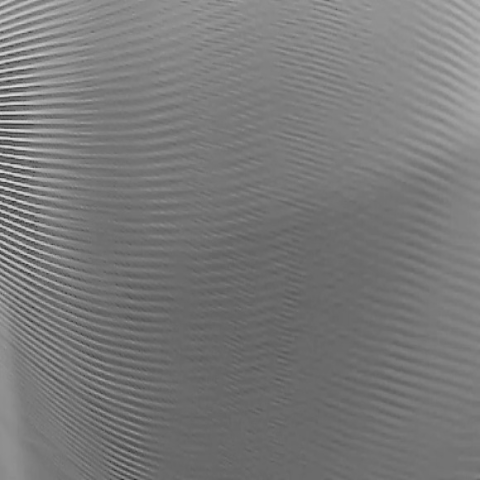

[[0.6196846]]

 ____________________________________________________________________________________________________ 




In [ ]:
#printing that wrong images for 0.5 threshold
id=(np.array(preds_bad_2)>0.5).nonzero()
for idx in id[0]:
  img_path=a+str(idx)+b
  r=prepare_img(img_path,(480,480),True)
  print(model_2.predict(r))
  print("\n","_"*100,"\n\n")


In [ ]:
cd ..

/content/drive/MyDrive/Internship Cilans/B_W Dataset(good and fault) Arducam IMX219


In [ ]:
!ls

Bad_bw	Good_bw


In [ ]:
cd Good_bw

/content/drive/MyDrive/Internship Cilans/B_W Dataset(good and fault) Arducam IMX219/Good_bw


In [ ]:
preds_good_2=[]
num_img_good=len(os.listdir())
for i in range(0,num_img_good):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_2.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_good_2.append(preds)


100.0 % wrong (good image) prediction for threshold of  0.1 

100.0 % wrong (good image) prediction for threshold of  0.2 

100.0 % wrong (good image) prediction for threshold of  0.3 

100.0 % wrong (good image) prediction for threshold of  0.4 

100.0 % wrong (good image) prediction for threshold of  0.5 



In [ ]:
length=len(preds_good_2)
for threshold in [0.3,0.5,0.7,0.9]:
  print((np.array(preds_good_2)<threshold).sum()/length*100,"% wrong (bad image) prediction for threshold of ", threshold,"\n")

0.0 % wrong (bad image) prediction for threshold of  0.3 

0.0 % wrong (bad image) prediction for threshold of  0.5 

0.0 % wrong (bad image) prediction for threshold of  0.7 

0.13054830287206268 % wrong (bad image) prediction for threshold of  0.9 



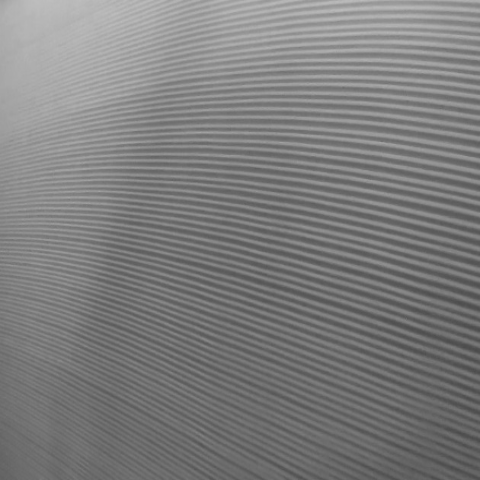

[[0.8848464]]

 ____________________________________________________________________________________________________ 




In [ ]:
#printing that wrong images for 0.9 threshold
id=(np.array(preds_good_2)<0.9).nonzero()
for idx in id[0]:
  img_path=a+str(idx)+b
  r=prepare_img(img_path,(480,480),True)
  print(model_2.predict(r))
  print("\n","_"*100,"\n\n")


# New Dataset Check

## test on bad images

In [ ]:
os.chdir("/content/drive/MyDrive/KnitSmart Data and Project Details (Confidential)/New dataset from 4k camera/defect")
a="F"
b=".jpg"

In [ ]:
preds_bad=[]
num_img=len(os.listdir())
for i in range(0,num_img):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_1.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_bad.append(preds)

In [ ]:
length=len(preds_bad)
for threshold in [0.1,0.2,0.3,0.4,0.5]:
  print((np.array(preds_bad)>threshold).sum()/length*100,"% wrong (good image) prediction for threshold of ", threshold,"\n")

100.0 % wrong (good image) prediction for threshold of  0.1 

100.0 % wrong (good image) prediction for threshold of  0.2 

100.0 % wrong (good image) prediction for threshold of  0.3 

100.0 % wrong (good image) prediction for threshold of  0.4 

100.0 % wrong (good image) prediction for threshold of  0.5 



In [ ]:
preds_bad=[]
num_img=len(os.listdir())
for i in range(0,num_img):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_2.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_bad.append(preds)

In [ ]:
length=len(preds_bad)
for threshold in [0.1,0.2,0.3,0.4,0.5]:
  print((np.array(preds_bad)>threshold).sum()/length*100,"% wrong (good image) prediction for threshold of ", threshold,"\n")

100.0 % wrong (good image) prediction for threshold of  0.1 

100.0 % wrong (good image) prediction for threshold of  0.2 

100.0 % wrong (good image) prediction for threshold of  0.3 

100.0 % wrong (good image) prediction for threshold of  0.4 

100.0 % wrong (good image) prediction for threshold of  0.5 



## test on good images

In [ ]:
os.chdir("/content/drive/MyDrive/KnitSmart Data and Project Details (Confidential)/New dataset from 4k camera/good")
a="F"
b=".jpg"

In [ ]:
preds_good=[]
num_img=len(os.listdir())
for i in range(1,num_img):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_1.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_good.append(preds)

In [ ]:
length=len(preds_good)
for threshold in [0.3,0.5,0.7]:
  print((np.array(preds_good)<threshold).sum()/length*100,"% wrong (bad image) prediction for threshold of ", threshold,"\n")

2.0202020202020203 % wrong (bad image) prediction for threshold of  0.3 

3.0303030303030303 % wrong (bad image) prediction for threshold of  0.5 

4.040404040404041 % wrong (bad image) prediction for threshold of  0.7 



In [ ]:
preds_good=[]
num_img=len(os.listdir())
for i in range(1,num_img):
  img_path=a+str(i)+b
  resized_img=prepare_img(img_path)
  preds=model_2.predict(resized_img)
  #print(preds,"\n\n","_"*50)
  preds_good.append(preds)

In [ ]:
length=len(preds_good)
for threshold in [0.3,0.5,0.7]:
  print((np.array(preds_good)<threshold).sum()/length*100,"% wrong (bad image) prediction for threshold of ", threshold,"\n")

2.0202020202020203 % wrong (bad image) prediction for threshold of  0.3 

2.0202020202020203 % wrong (bad image) prediction for threshold of  0.5 

2.0202020202020203 % wrong (bad image) prediction for threshold of  0.7 



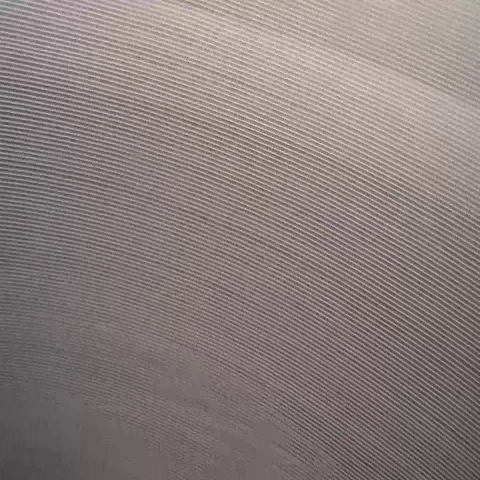

[[0.99996495]]

 ____________________________________________________________________________________________________ 




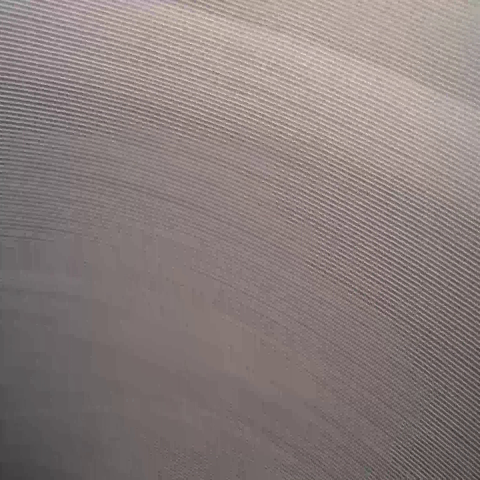

[[0.19859752]]

 ____________________________________________________________________________________________________ 




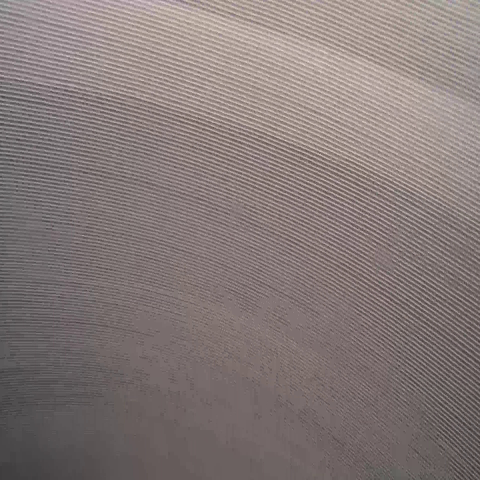

[[0.9998458]]

 ____________________________________________________________________________________________________ 




In [ ]:
#printing that wrong images for 0.5 threshold
id=(np.array(preds_good)<0.5).nonzero()
for idx in id[0]:
  img_path=a+str(idx)+b
  r=prepare_img(img_path,(480,480),True)
  print(model_1.predict(r))
  print("\n","_"*100,"\n\n")
